In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from shapely.geometry import Point

In [2]:
trash = pd.read_csv('../data/trash_hauler_report.csv')
trash

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
0,25270,11/01/17,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1.727970e+06,686779.478089
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066
...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1.781137e+06,632448.551144
20222,267126,11/01/19,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1.749711e+06,669201.601569
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1.770293e+06,674936.303809
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1.785225e+06,627146.400187


In [3]:
# python didn't recognize 'Request' when I tried to find missed pickups the first time
trash.columns

Index(['Request Number', 'Date Opened', 'Request ', 'Description',
       'Incident Address', 'Zip Code', 'Trash Hauler', 'Trash Route',
       'Council District', 'State Plan X', 'State Plan Y'],
      dtype='object')

In [4]:
# turns out it was because there's a random trailing space there... let's try this again
missed = trash.loc[(trash['Request '].str.contains('missed pickup', case = False, na = False)) | (trash['Description'].str.contains('missed|skipped|missing|misses|miss|skip|skipping|not collected|not emptied|not being collected|full|not empty|not taken|not being taken|still out|not picked up|not being picked up|not being emptied|never came|forgot|never emptied', case = False, na = False))]
missed

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066
7,25327,11/01/17,Trash Collection Complaint,"Trash out on time, miss again Tuesday. ALLEY",1816 Jo Johnston Ave,37203.0,METRO,9208,21.0,1.731459e+06,666013.601229
...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1.781137e+06,632448.551144
20222,267126,11/01/19,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1.749711e+06,669201.601569
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1.770293e+06,674936.303809
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1.785225e+06,627146.400187


In [5]:
duplicates = missed.loc[missed.duplicated(subset = 'Incident Address', keep = 'first') == True]
duplicates
# if I did this right, these should be all the missed pickups minus the first offense

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
46,25586,11/02/17,Trash - Curbside/Alley Missed Pickup,Missed pickup,4311 dakota ave,37209.0,RED RIVER,1308,24.0,1.720743e+06,661438.818510
137,26284,11/06/17,Trash - Curbside/Alley Missed Pickup,missed,3124 Murfreesboro Pike,37013.0,RED RIVER,4502,33.0,1.784737e+06,629098.451312
156,26674,11/07/17,Trash - Curbside/Alley Missed Pickup,customer says trash is not being picked up bet...,111 2nd Ave N,37201.0,NaN,NaN,19.0,1.739543e+06,666600.801765
160,26745,11/07/17,Trash - Curbside/Alley Missed Pickup,Missed.,1112 Joseph Ave A,37207.0,METRO,9207,5.0,1.740731e+06,677098.400346
167,26864,11/08/17,Trash - Curbside/Alley Missed Pickup,customer says the trash pickup was missed again,3210 Whites Creek Pike,37207.0,RED RIVER,3201,3.0,1.726433e+06,691919.200296
...,...,...,...,...,...,...,...,...,...,...,...
20213,267035,11/01/19,Trash - Curbside/Alley Missed Pickup,"constantly missed, please pick up","1400 Dickerson Pike, Nashville, TN 37207, Unit...",37207.0,METRO,9204,5.0,1.740796e+06,679412.798844
20214,267060,11/01/19,Trash - Curbside/Alley Missed Pickup,entire street missed,"639 Heritage Dr, Nashville, TN 37115, United S...",37115.0,RED RIVER,3412,8.0,1.754842e+06,705326.399554
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1.781137e+06,632448.551144
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1.770293e+06,674936.303809


In [6]:
# which means the total fines would just be this number of rows * 200
# so $1,056,000 total

In [7]:
missed_coordinates = missed.drop(columns = ['Request Number','Date Opened', 'Request ', 'Description', 'Incident Address', 'Zip Code', 'Trash Hauler', 'Trash Route', 'Council District'])
missed_coordinates

,State Plan X,State Plan Y
1,1.721259e+06,685444.799565
2,1.707027e+06,659887.471571
3,1.735692e+06,685027.245923
4,1.710186e+06,664205.101066
7,1.731459e+06,666013.601229
...,...,...
20221,1.781137e+06,632448.551144
20222,1.749711e+06,669201.601569
20223,1.770293e+06,674936.303809
20224,1.785225e+06,627146.400187


In [8]:
missed_coordinates['geometry'] = missed_coordinates.apply(lambda row: Point(row['State Plan X'], row['State Plan Y']), axis=1)

In [9]:
missed_geo = gpd.GeoDataFrame(missed_coordinates, geometry='geometry', crs="EPSG:2274")
missed_geo

,State Plan X,State Plan Y,geometry
1,1.721259e+06,685444.799565,POINT (1721259.366 685444.800)
2,1.707027e+06,659887.471571,POINT (1707026.753 659887.472)
3,1.735692e+06,685027.245923,POINT (1735691.771 685027.246)
4,1.710186e+06,664205.101066,POINT (1710185.772 664205.101)
7,1.731459e+06,666013.601229,POINT (1731459.367 666013.601)
...,...,...,...
20221,1.781137e+06,632448.551144,POINT (1781137.263 632448.551)
20222,1.749711e+06,669201.601569,POINT (1749711.399 669201.602)
20223,1.770293e+06,674936.303809,POINT (1770293.388 674936.304)
20224,1.785225e+06,627146.400187,POINT (1785224.998 627146.400)


In [10]:
missed_geo = missed_geo.to_crs("EPSG:4326")
missed_geo

,State Plan X,State Plan Y,geometry
1,1.721259e+06,685444.799565,POINT (-86.83810 36.21347)
2,1.707027e+06,659887.471571,POINT (-86.88556 36.14292)
3,1.735692e+06,685027.245923,POINT (-86.78917 36.21265)
4,1.710186e+06,664205.101066,POINT (-86.87499 36.15486)
7,1.731459e+06,666013.601229,POINT (-86.80299 36.16033)
...,...,...,...
20221,1.781137e+06,632448.551144,POINT (-86.63397 36.06913)
20222,1.749711e+06,669201.601569,POINT (-86.74124 36.16948)
20223,1.770293e+06,674936.303809,POINT (-86.67165 36.18564)
20224,1.785225e+06,627146.400187,POINT (-86.62003 36.05464)


In [11]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
zipcodes.head()

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [12]:
missed_geo = missed_geo.drop(columns = ['State Plan X', 'State Plan Y'])
missed_geo

,geometry
1,POINT (-86.83810 36.21347)
2,POINT (-86.88556 36.14292)
3,POINT (-86.78917 36.21265)
4,POINT (-86.87499 36.15486)
7,POINT (-86.80299 36.16033)
...,...
20221,POINT (-86.63397 36.06913)
20222,POINT (-86.74124 36.16948)
20223,POINT (-86.67165 36.18564)
20224,POINT (-86.62003 36.05464)


In [13]:
missbyzip = gpd.sjoin(missed_geo, zipcodes, predicate = 'within')
missbyzip

,geometry,index_right,zip,objectid,po_name,shape_stlength,shape_starea
1,POINT (-86.83810 36.21347),27,37218,55,NASHVILLE,253501.29953687743,1071962039.8548584
2,POINT (-86.88556 36.14292),12,37209,10,NASHVILLE,310224.91345860378,1001364029.2892456
3,POINT (-86.78917 36.21265),42,37207,48,NASHVILLE,196775.60104082408,556772811.32653809
4,POINT (-86.87499 36.15486),12,37209,10,NASHVILLE,310224.91345860378,1001364029.2892456
7,POINT (-86.80299 36.16033),35,37203,33,NASHVILLE,91285.438580354588,120649702.5546875
...,...,...,...,...,...,...,...
20221,POINT (-86.63397 36.06913),51,37013,34,ANTIOCH,349164.88029162859,1150567551.5894165
20222,POINT (-86.74124 36.16948),13,37206,2,NASHVILLE,75782.862116030214,221537063.58166504
20223,POINT (-86.67165 36.18564),37,37214,6,NASHVILLE,165410.80552044208,674068994.30090332
20224,POINT (-86.62003 36.05464),51,37013,34,ANTIOCH,349164.88029162859,1150567551.5894165


In [14]:
fines_coordinates = duplicates.drop(columns = ['Request Number','Date Opened', 'Request ', 'Description', 'Incident Address', 'Zip Code', 'Trash Hauler', 'Trash Route', 'Council District'])

In [15]:
fines_coordinates['geometry'] = fines_coordinates.apply(lambda row: Point(row['State Plan X'], row['State Plan Y']), axis=1)

In [16]:
fines_geo = gpd.GeoDataFrame(fines_coordinates, geometry='geometry', crs="EPSG:2274")

In [17]:
fines_geo = fines_geo.to_crs("EPSG:4326")

In [18]:
fines_geo = fines_geo.drop(columns = ['State Plan X', 'State Plan Y'])
fines_geo

,geometry
46,POINT (-86.83916 36.14752)
137,POINT (-86.62172 36.05999)
156,POINT (-86.77562 36.16212)
160,POINT (-86.77188 36.19098)
167,POINT (-86.82075 36.23137)
...,...
20213,POINT (-86.77172 36.19734)
20214,POINT (-86.72477 36.26882)
20221,POINT (-86.63397 36.06913)
20223,POINT (-86.67165 36.18564)


In [19]:
finesbyzip = gpd.sjoin(fines_geo, zipcodes, predicate = 'within')
finesbyzip

,geometry,index_right,zip,objectid,po_name,shape_stlength,shape_starea
46,POINT (-86.83916 36.14752),12,37209,10,NASHVILLE,310224.91345860378,1001364029.2892456
137,POINT (-86.62172 36.05999),51,37013,34,ANTIOCH,349164.88029162859,1150567551.5894165
156,POINT (-86.77562 36.16212),36,37201,14,NASHVILLE,25670.555742711778,11151362.94934082
160,POINT (-86.77188 36.19098),42,37207,48,NASHVILLE,196775.60104082408,556772811.32653809
167,POINT (-86.82075 36.23137),42,37207,48,NASHVILLE,196775.60104082408,556772811.32653809
...,...,...,...,...,...,...,...
20213,POINT (-86.77172 36.19734),42,37207,48,NASHVILLE,196775.60104082408,556772811.32653809
20214,POINT (-86.72477 36.26882),0,37115,1,MADISON,178783.02488886821,596553400.57885742
20221,POINT (-86.63397 36.06913),51,37013,34,ANTIOCH,349164.88029162859,1150567551.5894165
20223,POINT (-86.67165 36.18564),37,37214,6,NASHVILLE,165410.80552044208,674068994.30090332


In [24]:
missbyzip = missbyzip.drop(columns = 'index_right')
missbyzip

,geometry,zip,objectid,po_name,shape_stlength,shape_starea
1,POINT (-86.83810 36.21347),37218,55,NASHVILLE,253501.29953687743,1071962039.8548584
2,POINT (-86.88556 36.14292),37209,10,NASHVILLE,310224.91345860378,1001364029.2892456
3,POINT (-86.78917 36.21265),37207,48,NASHVILLE,196775.60104082408,556772811.32653809
4,POINT (-86.87499 36.15486),37209,10,NASHVILLE,310224.91345860378,1001364029.2892456
7,POINT (-86.80299 36.16033),37203,33,NASHVILLE,91285.438580354588,120649702.5546875
...,...,...,...,...,...,...
20221,POINT (-86.63397 36.06913),37013,34,ANTIOCH,349164.88029162859,1150567551.5894165
20222,POINT (-86.74124 36.16948),37206,2,NASHVILLE,75782.862116030214,221537063.58166504
20223,POINT (-86.67165 36.18564),37214,6,NASHVILLE,165410.80552044208,674068994.30090332
20224,POINT (-86.62003 36.05464),37013,34,ANTIOCH,349164.88029162859,1150567551.5894165


In [25]:
finesbyzip = finesbyzip.drop(columns = 'index_right')
finesbyzip

,geometry,zip,objectid,po_name,shape_stlength,shape_starea
46,POINT (-86.83916 36.14752),37209,10,NASHVILLE,310224.91345860378,1001364029.2892456
137,POINT (-86.62172 36.05999),37013,34,ANTIOCH,349164.88029162859,1150567551.5894165
156,POINT (-86.77562 36.16212),37201,14,NASHVILLE,25670.555742711778,11151362.94934082
160,POINT (-86.77188 36.19098),37207,48,NASHVILLE,196775.60104082408,556772811.32653809
167,POINT (-86.82075 36.23137),37207,48,NASHVILLE,196775.60104082408,556772811.32653809
...,...,...,...,...,...,...
20213,POINT (-86.77172 36.19734),37207,48,NASHVILLE,196775.60104082408,556772811.32653809
20214,POINT (-86.72477 36.26882),37115,1,MADISON,178783.02488886821,596553400.57885742
20221,POINT (-86.63397 36.06913),37013,34,ANTIOCH,349164.88029162859,1150567551.5894165
20223,POINT (-86.67165 36.18564),37214,6,NASHVILLE,165410.80552044208,674068994.30090332


<Axes: >

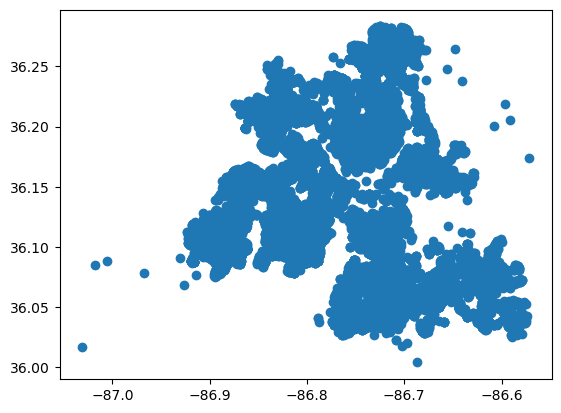

In [26]:
missbyzip.plot()

In [27]:
#that doesn't look right

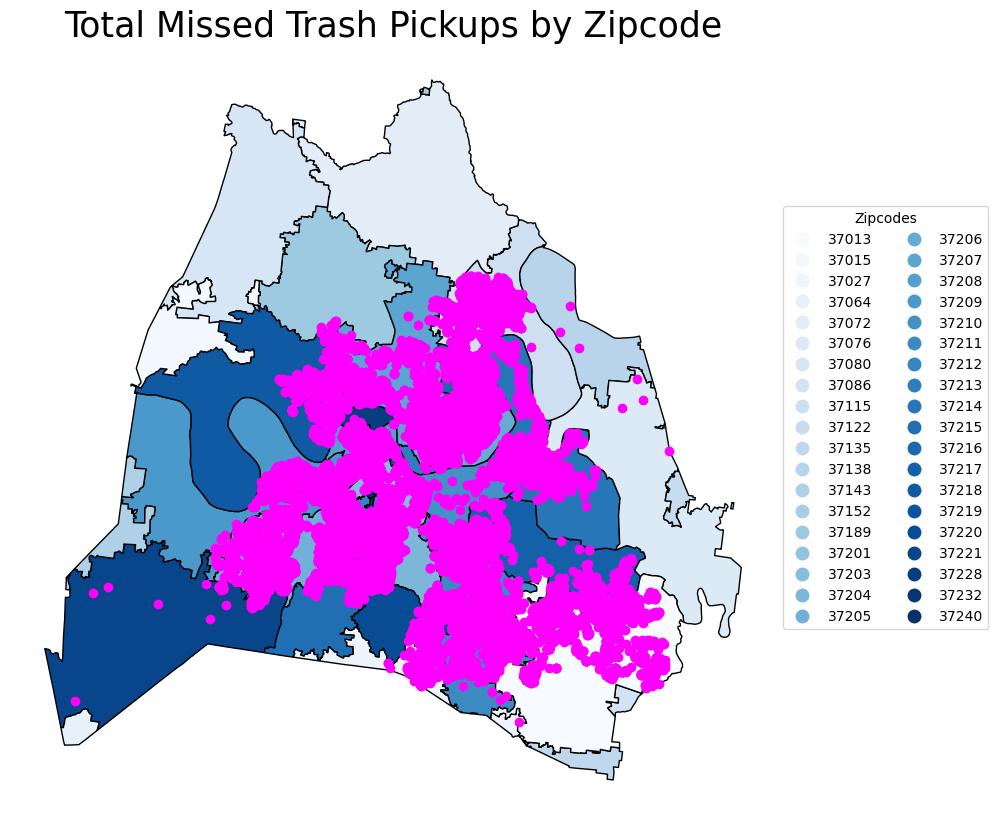

In [67]:
legend_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 'bbox_to_anchor': (1, 0.8), 'ncol': 2}
missbyzip.plot(ax = zipcodes.plot(figsize= (10,10), column = 'zip', edgecolor = 'black', cmap = 'Blues', legend = True, legend_kwds = legend_kwds), color = 'fuchsia')
plt.axis('off')
plt.title('Total Missed Trash Pickups by Zipcode', fontsize = 25);

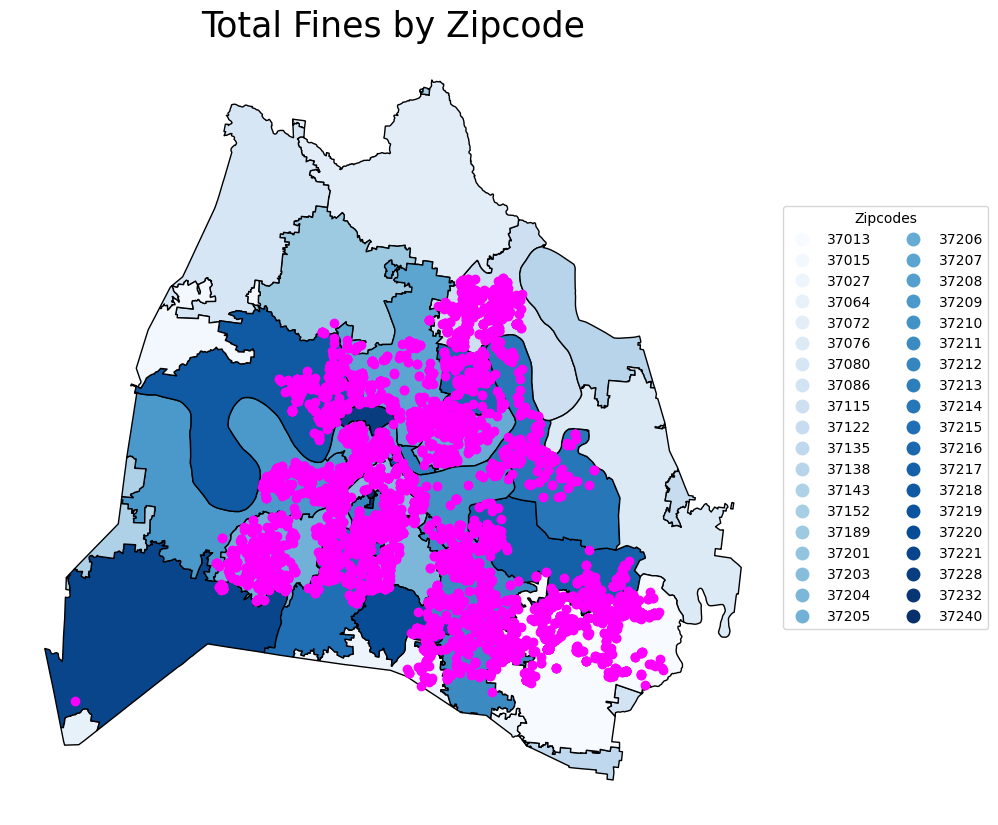

In [69]:
legend_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 'bbox_to_anchor': (1, 0.8), 'ncol': 2}
finesbyzip.plot(ax = zipcodes.plot(figsize= (10,10), column = 'zip', edgecolor = 'black', cmap = 'Blues', legend = True, legend_kwds = legend_kwds), color = 'fuchsia')
plt.axis('off')
plt.title('Total Fines by Zipcode', fontsize = 25);

In [77]:
groups = missed.groupby('Zip Code').count()
groups.sort_values(by = 'Request Number', ascending = False)

,Request Number,Date Opened,Request,Description,Incident Address,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
Zip Code,,,,,,,,,,
37013.0,2131,2131,2131,2127,2131,2059,2063,2131,2130,2130
37211.0,2056,2056,2056,2052,2056,1986,1988,2056,2056,2056
37205.0,1318,1318,1318,1317,1318,1260,1259,1318,1318,1318
37215.0,1312,1312,1312,1311,1312,1262,1264,1312,1311,1311
37209.0,1237,1237,1237,1235,1237,1193,1193,1237,1237,1237
37207.0,1113,1113,1113,1111,1113,1059,1059,1113,1113,1113
37115.0,1103,1103,1103,1101,1103,1039,1056,1103,1103,1103
37206.0,1079,1079,1079,1079,1078,1049,1048,1078,1078,1078
37208.0,933,933,933,930,933,896,895,933,933,933


In [78]:
groups2 = duplicates.groupby('Zip Code').count()
groups2.sort_values(by = 'Request Number', ascending = False)

,Request Number,Date Opened,Request,Description,Incident Address,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
Zip Code,,,,,,,,,,
37013.0,603,603,603,602,603,563,566,603,602,602
37211.0,585,585,585,584,585,554,554,585,585,585
37205.0,473,473,473,473,473,437,437,473,473,473
37215.0,430,430,430,429,430,409,411,430,430,430
37115.0,378,378,378,378,378,355,357,378,378,378
37209.0,360,360,360,360,360,339,339,360,360,360
37207.0,313,313,313,313,313,284,284,313,313,313
37208.0,277,277,277,276,277,261,261,277,277,277
37218.0,272,272,272,272,271,251,250,272,272,272


In [79]:
groups.shape

(28, 10)

In [80]:
groups2.shape

(24, 10)

In [81]:
zips = trash.groupby('Zip Code').count()
zips.shape

(28, 10)

In [20]:
#ignore the rest of this code... this was from before I knew how to convert the coordinates
#it's irrelevant now but I'm keeping it in here it just in case I need it for something in the future

In [21]:
#missed_map_geo = gpd.GeoDataFrame(missed_map, geometry = gpd.points_from_xy(missed_map['State Plan X'], missed_map['State Plan Y']), crs="EPSG:4326")
#missed_map_geo

In [22]:
#missed_map_geo['Zip Code'] = missed_map_geo['Zip Code'].fillna(0)

In [23]:
#missed_map_geo['Zip Code'] = missed_map_geo['Zip Code'].astype(int)
#missed_map_geo